## Handwritten digits
Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

Let's load the dataset first.

In [28]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [29]:

digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())
#print(digits.DESCR)

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


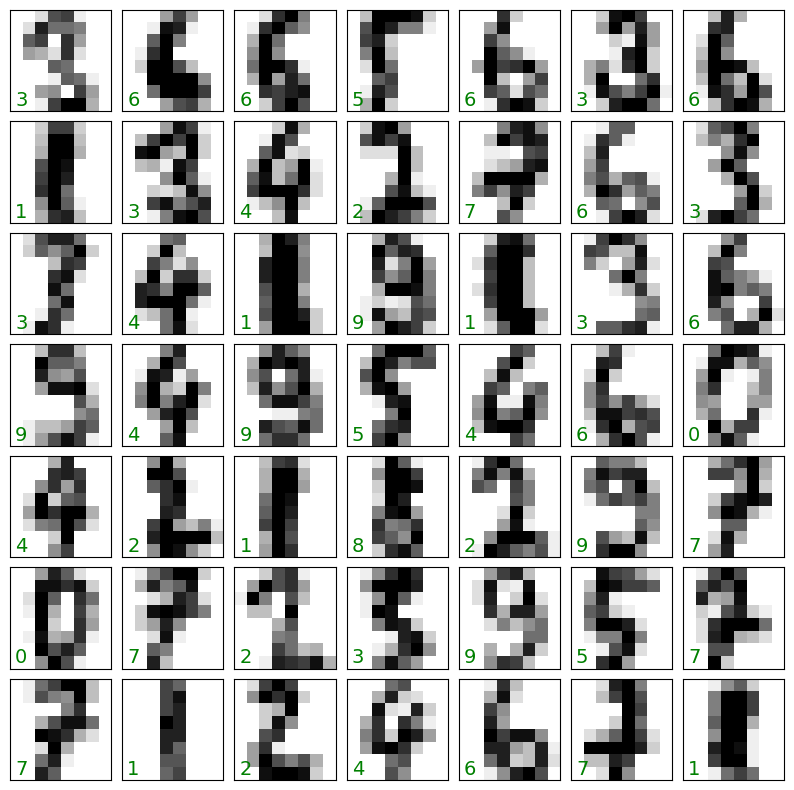

In [30]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(1916)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).


In [31]:
from sklearn.manifold import Isomap

X = digits.data
print('Initial Shape: ', X.shape)

# n_components : number of components for the manifold
isomap = Isomap(n_components=2)
X_reduced = isomap.fit_transform(X)
print('Reduced Shape: ', X_reduced.shape)



Initial Shape:  (1797, 64)


/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Reduced Shape:  (1797, 2)


/var/folders/sp/f1ltwhln0klf22nrhl_cfvbh0000gn/T/ipykernel_5237/3320130683.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5, c=digits.target, cmap=plt.cm.get_cmap('rainbow', 10))


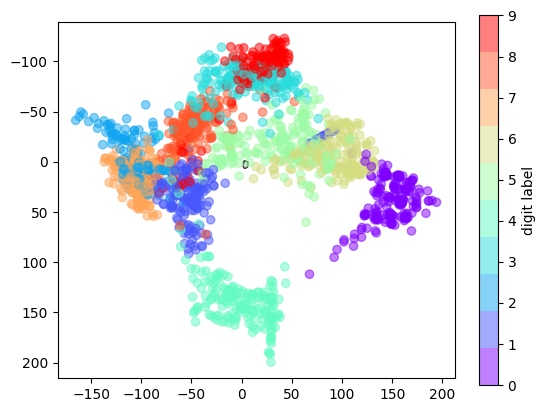

In [32]:
plt.imshow((digits.images[0]), cmap='binary')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5, c=digits.target, cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, shuffle=False)

In [34]:
#Logic Regression Classification
clf = LogisticRegression(random_state=10, solver='sag')

#Fit on train 
clf.fit(X_train, y_train)

# Predict on test and train
y_predicted_test = clf.predict(X_test)
y_predicted_train = clf.predict(X_train)

#Accuracy
accuracy_test = accuracy_score(y_test, y_predicted_test)
accuracy_train = accuracy_score(y_train, y_predicted_train)

print('Accuracy on test: ', accuracy_test)
print('Accuracy on train: ', accuracy_train)

Accuracy on test:  0.9027777777777778
Accuracy on train:  1.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


As the model has 'learned' on the train dataset it doesn't misclassify those data. However, on the 'new data' that are in the test dataset, the model does not fully classify the digits correctly.

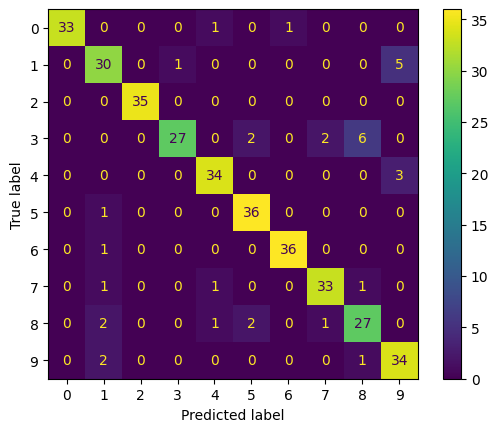

In [35]:
cm = confusion_matrix(y_test,y_predicted_test)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
cm_plot.plot()

The algorithm has misclassified mostly the 3 digit as an 8, 1 as 9. 